<a href="https://colab.research.google.com/github/lgeralas/Examen1/blob/main/lastmile_delivery_operations_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#importar librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
 #cargar archivo csv desde equipo 
from google.colab import files 
files.upload()

In [10]:
#Carga desde un archivo .csv sin indice
lastmile = pd.read_csv('lastmile_delivery_operations_mit_lift_lab.csv')

In [11]:
#Verificamos info del Data Frame
lastmile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   _record_id                                     182 non-null    object 
 1   _title                                         176 non-null    object 
 2   _server_updated_at                             182 non-null    object 
 3   _updated_by                                    182 non-null    object 
 4   _geometry                                      182 non-null    object 
 5   _latitude                                      182 non-null    float64
 6   _longitude                                     182 non-null    float64
 7   arrival_of_the_freight_vehicle                 182 non-null    object 
 8   plates                                         181 non-null    object 
 9   company_if_visible                             109 non

In [12]:
#Identificar valores nulos por columna
valores_nulos=lastmile.isnull().sum()
valores_nulos

_record_id                                         0
_title                                             6
_server_updated_at                                 0
_updated_by                                        0
_geometry                                          0
_latitude                                          0
_longitude                                         0
arrival_of_the_freight_vehicle                     0
plates                                             1
company_if_visible                                73
visit_purpose                                      0
type_of_vehicle                                    0
number_of_operators                                0
refrigerated_truck                                 0
type_of_cargo                                      0
picture_of_the_parked_freight_vehicle              0
departure_of_the_freight_vehicle                   0
where_was_the_vehicle_parked                       0
while_parked_was_the_engine_running           

In [17]:
#Sustituir valores nulos por un string en concreto de _title, aqui se pondrá no proporciono lugar de donde se recabo el dato
lastmile['_title']=lastmile['_title'].fillna('No proporciona lugar')

#Sustituir valores nulos por un string en concreto de company_if_visible, aqui se pondrá que la compañia del camión no era visible 
lastmile['company_if_visible']=lastmile['company_if_visible'].fillna('Compañia no visible')

#Sustituir valores nulos por un string en concreto de para plates, aqui se indicará que no se registro la placa del camión o auto repartidor
lastmile['plates']=lastmile['plates'].fillna('Placa del auto no proporcionada')

In [18]:
#Sustituir valores nulos por un valor numérico en concreto para serving_customer, para este caso será 1 ya que al observar los datos en concreto de esta columna se tiene que es el número que más se repita
lastmile['serving_customer']=lastmile['serving_customer'].fillna(1)


In [20]:
#Eliminamos columnas innecesarias ya que tienen pocos datos, los cuales no afectarán al análisis de datos
lastmile=lastmile.drop(['describe_the_accident'], axis=1)
lastmile=lastmile.drop(['maximum_number_of_vehicles_in_the_traffic_jam'], axis=1)

<Figure size 1080x576 with 0 Axes>

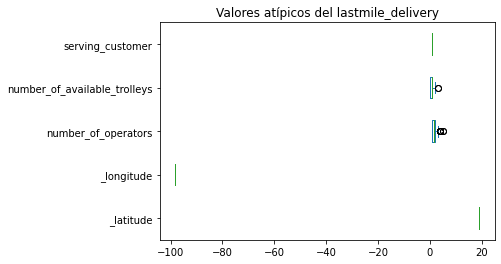

In [22]:
#Realizamos diagrama de caja o bigote de cada columna del data frame
fig=plt.figure(figsize=(15,8))
lastmile.plot(kind='box',vert=False)
plt.title('Valores atípicos del lastmile_delivery')
plt.show () #dibujamos el diagrama

In [28]:
#Método aplicando desviación estandar. Encuentra los valores extremos 
y=lastmile
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print('Limite superior permitido', Limite_Superior)
print('Limite inferior permitido', Limite_Inferior)

Limite superior permitido _latitude                       19.112587
_longitude                     -98.109219
number_of_operators              4.236537
number_of_available_trolleys     2.881871
serving_customer                 1.000000
dtype: float64
Limite inferior permitido _latitude                       18.967026
_longitude                     -98.361737
number_of_operators             -0.884889
number_of_available_trolleys    -1.530223
serving_customer                 1.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [29]:
#Encontramos outliers del Dataframe
outliers= lastmile[(y>Limite_Superior)|(y<Limite_Inferior)]

#Obtenemos datos limpiosy los outliers se convertiran en nulos en el Dataframe
data3=lastmile[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,where_was_the_vehicle_parked,while_parked_was_the_engine_running,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,noise,traffic_congestion
0,NaN,NaN,NaN,NaN,NaN,19.056893,-98.233489,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,19.056849,-98.233484,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,19.059677,-98.233916,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,19.062695,-98.228567,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,19.062724,-98.231397,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,19.043612,-98.194933,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,19.043607,-98.194856,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,19.043336,-98.194503,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
180,NaN,NaN,NaN,NaN,NaN,19.043576,-98.194873,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN


In [30]:
#eliminamos columnas innecesarias que marcan los valores nulos en el programa 
data3= data3.drop(['_record_id','_title', '_server_updated_at', '_updated_by','_geometry', 'arrival_of_the_freight_vehicle','plates','company_if_visible','visit_purpose', 'type_of_vehicle','refrigerated_truck','type_of_cargo','picture_of_the_parked_freight_vehicle', 'departure_of_the_freight_vehicle','where_was_the_vehicle_parked','while_parked_was_the_engine_running', 'used_traffic_cone','vehicles_unloading_door','garage_blocking','accident','noise','traffic_congestion' ], axis=1)
data3

,_latitude,_longitude,number_of_operators,number_of_available_trolleys,serving_customer
0,19.056893,-98.233489,1.0,1.0,1.0
1,19.056849,-98.233484,2.0,1.0,1.0
2,19.059677,-98.233916,1.0,0.0,1.0
3,19.062695,-98.228567,1.0,2.0,1.0
4,19.062724,-98.231397,2.0,2.0,1.0
...,...,...,...,...,...
177,19.043612,-98.194933,1.0,0.0,1.0
178,19.043607,-98.194856,1.0,0.0,1.0
179,19.043336,-98.194503,1.0,1.0,1.0
180,19.043576,-98.194873,2.0,0.0,1.0


In [ ]:
#Reemplazar valores átipicos (nulos) dE la base de datos con mean() para así evitar que halla valores nulos que se hallan eliminado con el método de desviación estandar
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))

In [32]:
#Unimos la columna 'indice_tiempo' con el data frame
strings=lastmile[['_record_id','_title', '_server_updated_at', '_updated_by','_geometry', 'arrival_of_the_freight_vehicle','plates','company_if_visible','visit_purpose', 'type_of_vehicle','refrigerated_truck','type_of_cargo','picture_of_the_parked_freight_vehicle', 'departure_of_the_freight_vehicle','where_was_the_vehicle_parked','while_parked_was_the_engine_running', 'used_traffic_cone','vehicles_unloading_door','garage_blocking','accident','noise','traffic_congestion' ]]
Datos_limpios=pd.concat([strings, data_clean], axis=1)
Datos_limpios

,_record_id,_title,_server_updated_at,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,visit_purpose,type_of_vehicle,...,vehicles_unloading_door,garage_blocking,accident,noise,traffic_congestion,_latitude,_longitude,number_of_operators,number_of_available_trolleys,serving_customer
0,4408a234-9585-46fe-9b16-96c0faaf6db8,73 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 22:15:04 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),14:00,KB-7050-A,Ricolino,Delivery,Light truck or Van,...,Side,yes,no,no,no,19.056893,-98.233489,1.0,1.0,1.0
1,673cd0e3-7290-4c4d-a57f-096d16b78141,72 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 20:41:39 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),13:50,XC8687A,Marinela,Delivery,Heavy duty truck,...,Rear,no,no,no,no,19.056849,-98.233484,2.0,1.0,1.0
2,04e64464-3fbd-4ce1-99d8-5364e1567e8c,4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...,2022-11-12 18:02:57 UTC,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),11:47,SM 20745,La fete,Delivery,Pick-up,...,Side,no,no,no,no,19.059677,-98.233916,1.0,0.0,1.0
3,d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b,4501A Avenida 2 Poniente\nHeroica Puebla de Za...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),11:45,SP35169,Barcel,Delivery,Light truck or Van,...,Rear,yes,no,no,no,19.062695,-98.228567,1.0,2.0,1.0
4,eff15823-b1f2-4e82-afb2-2195635d1406,4717 Avenida Reforma\nHeroica Puebla de Zarago...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),11:41,SN89460,Compañia no visible,Delivery,Light truck or Van,...,Rear,no,no,no,no,19.062724,-98.231397,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,f964004e-67a0-4b75-b2b0-ce04b9f0b344,No proporciona lugar,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),10:36,HL-3785-F,Compañia no visible,Delivery,Light truck or Van,...,Rear,no,no,no,no,19.043612,-98.194933,1.0,0.0,1.0
178,5656a189-19f5-45a7-b53b-1a3db0de6571,No proporciona lugar,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),10:33,SP-29-798,Compañia no visible,Delivery,Light truck or Van,...,Side,no,no,no,no,19.043607,-98.194856,1.0,0.0,1.0
179,bcbd462b-4c63-490b-bfec-0ef6657ead73,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:44 UTC,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),11:19,05-AP-6G,Infra,Delivery,Light truck or Van,...,Rear,no,no,no,no,19.043336,-98.194503,1.0,1.0,1.0
180,cd9ba76d-d899-4d87-9512-486aedb1b149,402E Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:14:09 UTC,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),11:03,LE-88-707,Alpura,Delivery,Pick-up,...,Rear,no,no,no,no,19.043576,-98.194873,2.0,0.0,1.0


In [33]:
#Identificar valores nulos por columna
valores_nulos=lastmile.isnull().sum()
valores_nulos

_record_id                               0
_title                                   0
_server_updated_at                       0
_updated_by                              0
_geometry                                0
_latitude                                0
_longitude                               0
arrival_of_the_freight_vehicle           0
plates                                   0
company_if_visible                       0
visit_purpose                            0
type_of_vehicle                          0
number_of_operators                      0
refrigerated_truck                       0
type_of_cargo                            0
picture_of_the_parked_freight_vehicle    0
departure_of_the_freight_vehicle         0
where_was_the_vehicle_parked             0
while_parked_was_the_engine_running      0
used_traffic_cone                        0
vehicles_unloading_door                  0
number_of_available_trolleys             0
serving_customer                         0
garage_bloc

In [35]:
#Convertir Dataframe a CSV
Datos_limpios.to_csv('Datos_limpios_lastmile_mit.csv')

#descargar archivo filtrado en csv
from google.colab import files

files.download('Datos_limpios_lastmile_mit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>